## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

In [3]:
p_df = (
    df
    .dropna()
    .copy()
)

## Ley de los grandes numeros

La probabilidad experimental tiende a la probabilidad teorica a medida que aumenta el numero de repeticiones del experimento

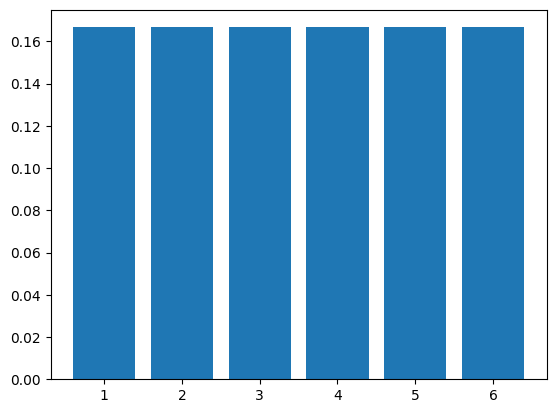

In [4]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

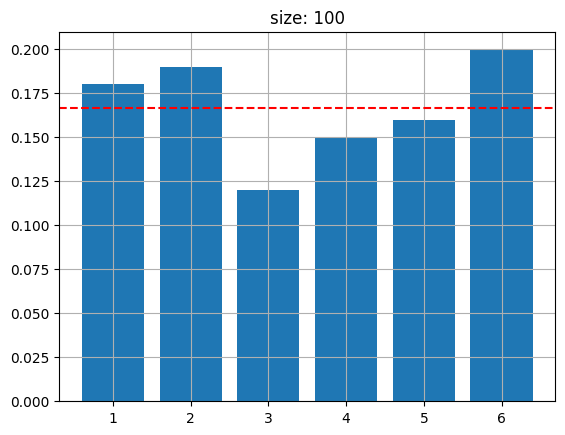

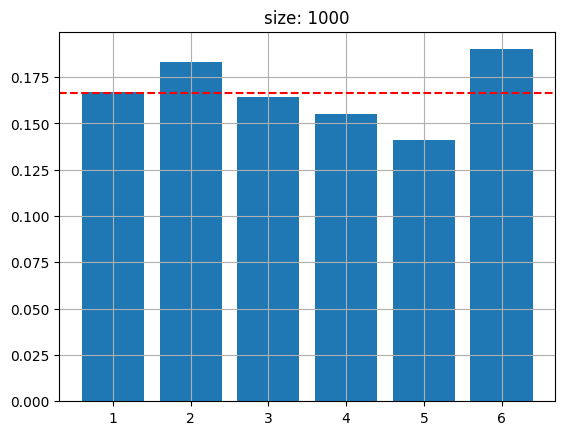

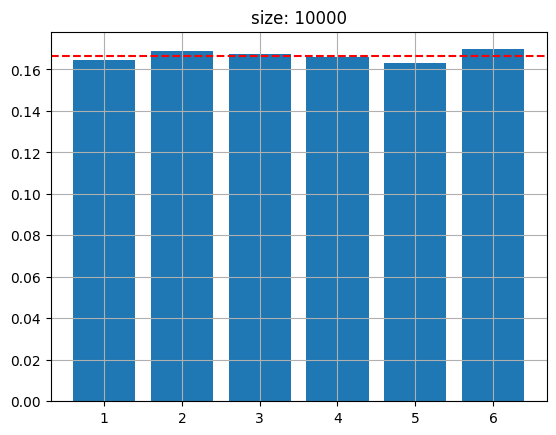

In [5]:
for exp in (100, 1000, 10000):
    sample = dice.sample(exp)
    sample_pmf = empiricaldist.Pmf.from_seq(sample).bar()
    plt.title(f'size: {exp}')
    plt.axhline(y=1/6, color='red', linestyle='--')
    plt.grid()
    plt.show()


## Teorema del limite central

La medias medias de las muestras tienden aproximadamente una distribución normal

<Axes: xlabel='sex'>

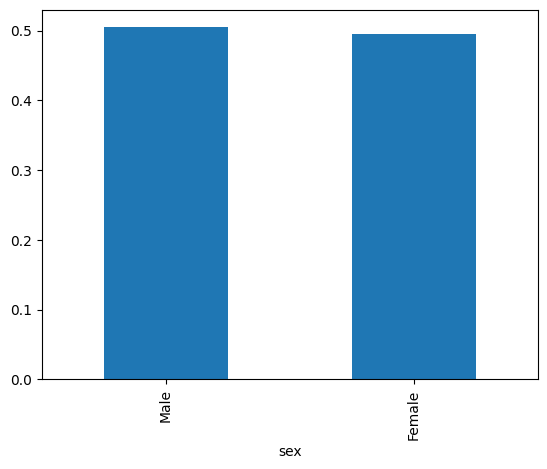

In [6]:
p_df.sex.value_counts(normalize=True).plot(kind='bar')

In [7]:
sex_numeric = p_df.sex.map({'Male':0,'Female':1})

In [8]:
samples = 1000
sample_size = 35
samples_df = pd.DataFrame()

for x in range(0, samples):
    aux_sample = sex_numeric.sample(sample_size).copy()
    samples_df[f'samp{x}'] = np.array(aux_sample)

female_population = samples_df.mean().mean()


/var/folders/5p/dpcr_mm95bq5mk_43qsxmvyr0000gn/T/ipykernel_2814/3567158904.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[f'samp{x}'] = np.array(aux_sample)
/var/folders/5p/dpcr_mm95bq5mk_43qsxmvyr0000gn/T/ipykernel_2814/3567158904.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[f'samp{x}'] = np.array(aux_sample)
/var/folders/5p/dpcr_mm95bq5mk_43qsxmvyr0000gn/T/ipykernel_2814/3567158904.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [9]:
female_population

np.float64(0.49457142857142855)

<Axes: ylabel='Density'>

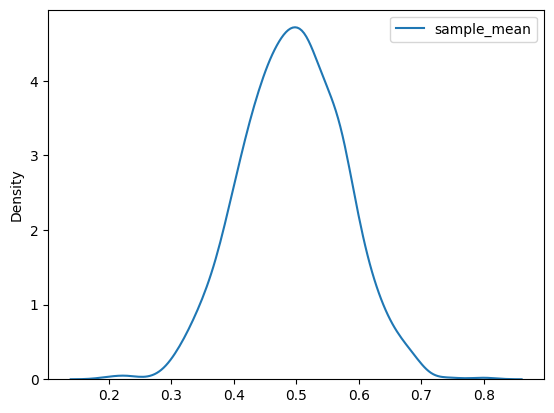

In [11]:
sample_binom = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data = sample_binom)